In [8]:
import numpy as np
import pandas as pd
import matplotlib
from collections import defaultdict
from matplotlib import pyplot as plt
from urllib import urlencode

import urllib2
import time
import json
import operator
import urllib2 

# Университеты

In [50]:
def update_uni_name(user):
    if 'university_name' not in user:
        return user
    if len(user['university_name']) > 20:
        user['university_name'] = user['university_name'][:20] + u"…"
    return user

def universities(users_dataset, save_as, drop_empty):
    with open(users_dataset) as data_file:    
        users = json.load(data_file)

    users = map(update_uni_name, users)
        
    df = pd.DataFrame(users)
    df = df.groupby('university_name').size()

    df.sort(['university_name'], ascending=False)
    if drop_empty:
        df = df.drop(df.index[[0]])
    plt.figure(figsize=(15, 20))
    plt.xkcd()

    matplotlib.rc('xtick', labelsize=0)
    matplotlib.rc('ytick', labelsize=20)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off') # labels along the bottom edge are off

    p = df[:15].plot(kind='barh', color='#555577')
    p.set_xlabel("")
    p.set_ylabel("")
    p.get_figure().set_size_inches(8, 8)
    p.get_figure().tight_layout()
    p.get_figure().savefig(save_as, dpi=100)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


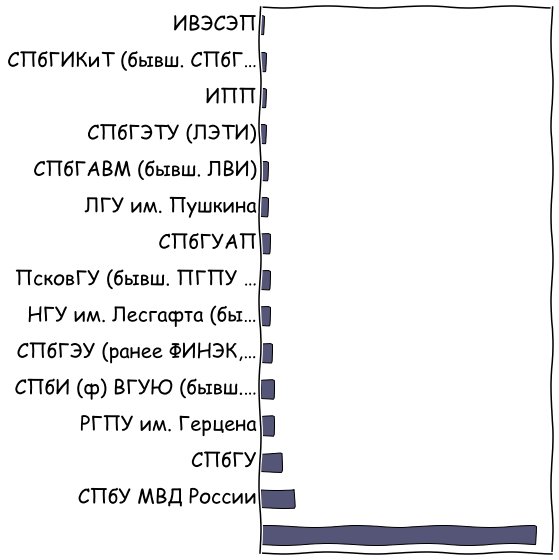

In [51]:
universities('datasets/police/users.json', 'images/universities_police_all.png', False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


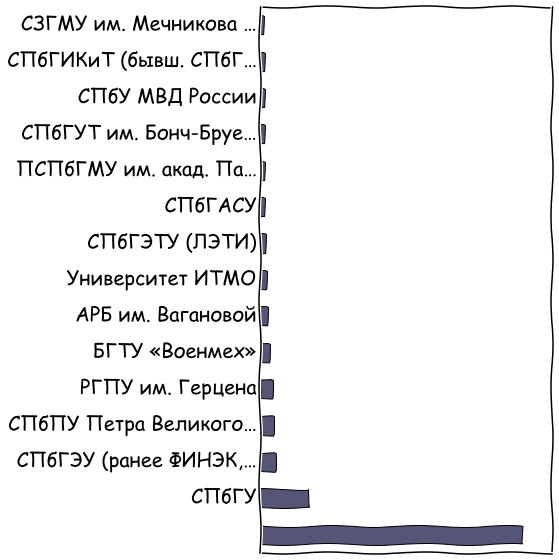

In [52]:
universities('datasets/people/users.json', 'images/universities_people_all.png', False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


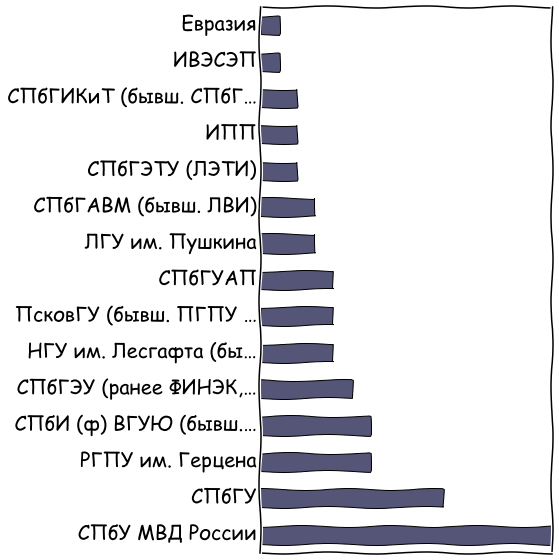

In [53]:
universities('datasets/police/users.json', 'images/universities_police_non_empty.png', True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


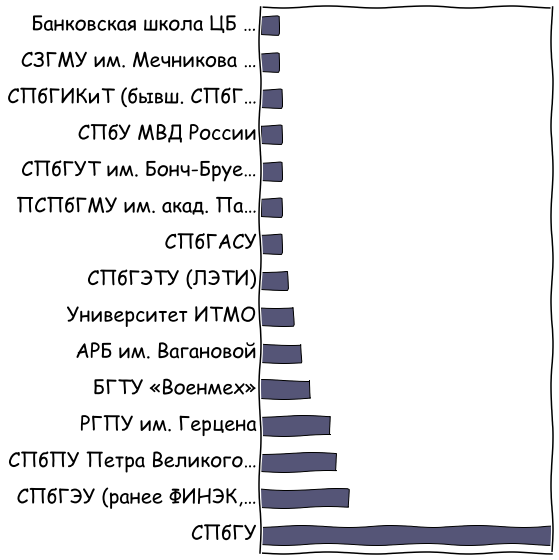

In [54]:
universities('datasets/people/users.json', 'images/universities_people_non_empty.png', True)

# Пол

In [41]:
def update_sex(user):
    user['sex_name'] = {
        0: 'N/A',
        1: u'Ж',
        2: u'М',
    }[user['sex']]
    return user
    
def sex_analysis(dataset_file, save_as):
    with open(dataset_file) as data_file:    
        users = json.load(data_file)

    users = map(update_sex, users)
    users = filter(lambda x: x['sex'] != 0, users)

    df = pd.DataFrame(users)
    df = df.groupby('sex_name').size()

    p = df.plot(kind='bar', color='#555577')

    plt.xkcd()

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off')         # labels along the bottom edge are off

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',
        right='off')         # labels along the bottom edge are off

    matplotlib.rc('xtick', labelsize=24)
    matplotlib.rc('ytick', labelsize=0)

    plt.xticks(rotation=0)

    p.set_xlabel("")
    p.get_figure().set_size_inches(4, 6)
    p.get_figure().tight_layout()
    p.get_figure().savefig(save_as, dpi=100)

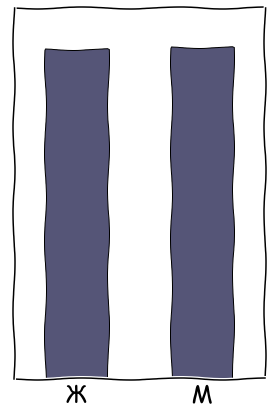

In [42]:
sex_analysis('datasets/people/users.json', 'images/sex_people.png')

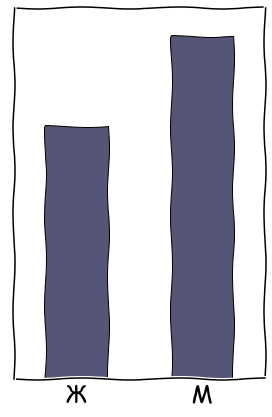

In [43]:
sex_analysis('datasets/police/users.json', 'images/sex_police.png')

# Популярные группы

In [ ]:
def process_group_info(i):
    return {"name": i.get('name', ''),
            "count": i.get('people_count', 0)}

def popular_groups(dataset_file, save_as):
    with open(dataset_file) as data_file:    
        groups_info = json.load(data_file)
    
    df = pd.DataFrame(map(process_group_info, groups_info[:15])).set_index('name')

    matplotlib.rc('xtick', labelsize=0)
    matplotlib.rc('ytick', labelsize=20)

    p = df.plot(kind='barh', legend=False, color='#555577')

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off')         # labels along the bottom edge are off

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',
        right='off')         # labels along the bottom edge are off

    p.set_ylabel("")
    p.set_xlabel("")

    p.get_figure().set_size_inches(20, 12)
    p.get_figure().tight_layout()
    p.get_figure().savefig('images/interests_police.png', dpi=100)

In [3]:
popular_groups('datasets/police/groups.json', 'images/popular_groups_police.png')

NameError: name 'popular_groups' is not defined

In [ ]:
popular_groups('datasets/people/groups.json', 'images/popular_groups_people.png')